In [1]:
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
import matplotlib.pyplot as plt

batch_size = 128
num_classes = 10
epochs = 3

img_rows, img_cols = 28, 28

/home/hectorceja/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(28, 28, 1)


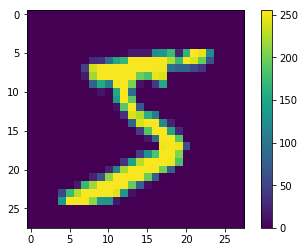

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

og_test = x_test

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
print(input_shape)

## se preparan los datos de entrenamiento y prueba

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## se prepara el modelo de predicción

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

## se comienza a entrenar el modelo

In [5]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 809s 13ms/step - loss: 0.2801 - acc: 0.9133 - val_loss: 0.0617 - val_acc: 0.9802
Epoch 2/3
60000/60000 [==============================] - 842s 14ms/step - loss: 0.0896 - acc: 0.9727 - val_loss: 0.0407 - val_acc: 0.9865
Epoch 3/3
60000/60000 [==============================] - 740s 12ms/step - loss: 0.0655 - acc: 0.9806 - val_loss: 0.0347 - val_acc: 0.9885


## el score queda el algoritmo es de 98%

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03474274228278955
Test accuracy: 0.9885


# Se comienza a predecir las imagenes que se crearon

/home/hectorceja/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Class:  2


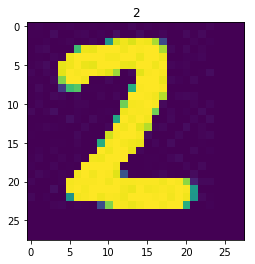

In [25]:
from keras.preprocessing import image

img = image.load_img(path="numbers/two.jpg",grayscale=True,target_size=(28,28,1))
img = image.img_to_array(img)
test_img = img.reshape(1, img_rows, img_cols, 1)
#test_img = img.reshape((1,784))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

/home/hectorceja/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Class:  3


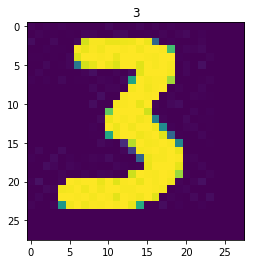

In [26]:
img = image.load_img(path="numbers/three.jpg",grayscale=True,target_size=(28,28,1))
img = image.img_to_array(img)
test_img = img.reshape(1, img_rows, img_cols, 1)
#test_img = img.reshape((1,784))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

/home/hectorceja/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Class:  5


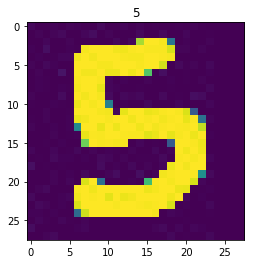

In [27]:
img = image.load_img(path="numbers/five.jpg",grayscale=True,target_size=(28,28,1))
img = image.img_to_array(img)
test_img = img.reshape(1, img_rows, img_cols, 1)
#test_img = img.reshape((1,784))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

/home/hectorceja/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Class:  6


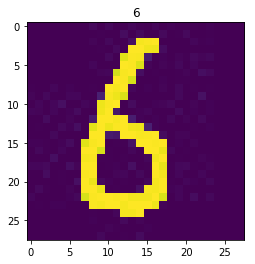

In [30]:
img = image.load_img(path="numbers/six.jpg",grayscale=True,target_size=(28,28,1))
img = image.img_to_array(img)
test_img = img.reshape(1, img_rows, img_cols, 1)
#test_img = img.reshape((1,784))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

/home/hectorceja/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Class:  8


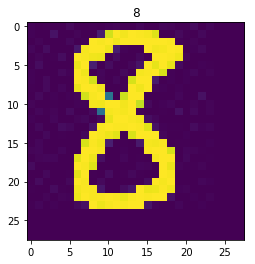

In [32]:
img = image.load_img(path="numbers/eight.jpg",grayscale=True,target_size=(28,28,1))
img = image.img_to_array(img)
test_img = img.reshape(1, img_rows, img_cols, 1)
#test_img = img.reshape((1,784))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()